# Basic Use Demo

Demonstration of the simplest use of Gerabaldi, useful as a template and starting point for building your own sims.

---------------------------------------------------------------------------------------------------------------------------

Copyright (c) 2023 Ian Hill

SPDX-License-Identifier: Apache-2.0

## 0. Library Installation

In [1]:
pip install gerabaldi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import gerabaldi 
from gerabaldi.models import * 
from gerabaldi.helpers import _on_demand_import

import seaborn as sb
from matplotlib import pyplot as plt

## 1. Functions Definition

In [3]:
def simulate(save_file: str = None):

    CELSIUS_TO_KELVIN = 273.15
    
    ########################################################################
    ### 1. Define the test to simulate                                   ###
    ########################################################################
    meas_spec = MeasSpec({'example': NUM_DEVICES}, {'temp': 25 + CELSIUS_TO_KELVIN})
    strs_spec = StrsSpec({'temp': 125 + CELSIUS_TO_KELVIN}, 100)
    test_spec = TestSpec([meas_spec, strs_spec, meas_spec])

    ########################################################################
    ### 2. Define the test/field environment                             ###
    ########################################################################
    test_env = PhysTestEnv()

    ########################################################################
    ### 3. Define the physical device model                              ###
    ########################################################################
    def ex_eqn(time, temp, a):
        return time * -a * temp
    dev_mdl = DeviceMdl(
        {'example': DegPrmMdl(
            {'linear': DegMechMdl(ex_eqn, a=LatentVar(Normal(1e-3, 2e-4)))})})

    ########################################################################
    ### 4. Simulate the test                                             ###
    ########################################################################
    report = gerabaldi.simulate(test_spec, dev_mdl, test_env)

    # Save the simulated results to a JSON file for reuse if desired
    if save_file:
        report.export_to_json(save_file, 'hours')
    return report


def visualize(report):
    
    SECONDS_PER_HOUR = 3600
    
    measured = report.measurements
    # Change time deltas to hours for processing
    measured['time_mod'] = measured['time'].apply(lambda time, **kwargs: time.total_seconds() / SECONDS_PER_HOUR, axis=1)

    # Set up the figure area
    colours = ['mediumpurple', 'green', 'cornflowerblue', 'aqua', 'limegreen']
    sb.set_theme(style='whitegrid', font='Times New Roman')
    sb.set_context('talk')
    f1, p1 = plt.subplots(figsize=(8, 6))

    # Plot the degradation curves, one curve per device
    measured = measured.set_index(['param', 'device #'])
    measured = measured.sort_index()
    for smpl in range(NUM_DEVICES):
        meas = measured.loc[('example', smpl)]
        p1.plot(meas['time_mod'], meas['measured'], color=colours[smpl])

    # Set some plot properties for a clean look
    p1.set(ylabel='Linear Degradation', xlabel='Elapsed Time (hours)', title='Example of Simple Degradation')
    sb.despine()
    plt.show()

## 2. Outputs

In [4]:
# Global Variables

NUM_DEVICES = 5

In [5]:
report = simulate()

### 2.1 Measurements DataFrame 

In [6]:
report.measurements

,param,device #,chip #,lot #,time,measured
0,example,0,0,0,0 days 00:00:00,0.000000
1,example,1,0,0,0 days 00:00:00,0.000000
2,example,2,0,0,0 days 00:00:00,0.000000
3,example,3,0,0,0 days 00:00:00,0.000000
4,example,4,0,0,0 days 00:00:00,0.000000
5,example,0,0,0,4 days 04:00:00,-39.332770
6,example,1,0,0,4 days 04:00:00,-43.992456
7,example,2,0,0,4 days 04:00:00,-28.554548
8,example,3,0,0,4 days 04:00:00,-31.014823
9,example,4,0,0,4 days 04:00:00,-40.952526


In [7]:
report.stress_summary

,stress step,duration,start time,end time,temp
0,unspecified,4 days 04:00:00,0 days,4 days 04:00:00,398.15


### 2.2 Report Visualization 

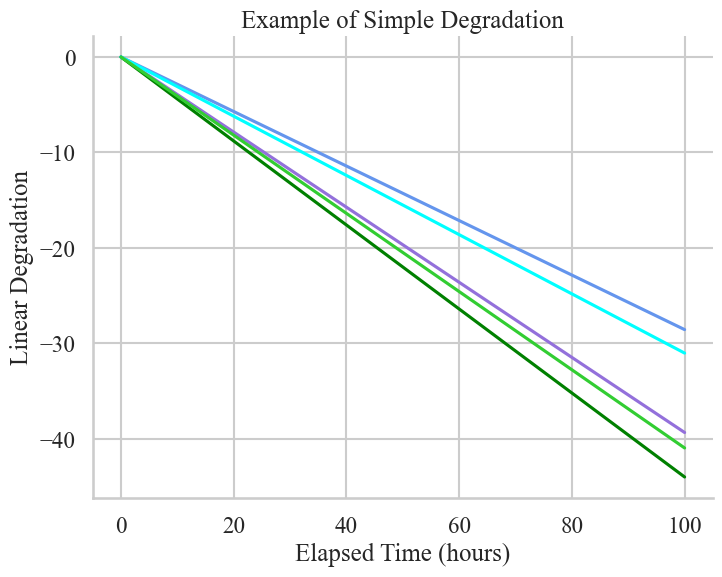

In [8]:
visualize(report)